# CHEST X-RAY IMAGE CLASSIFICATION PROJECT

Paolo Cavadini, June 2021.

Dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

Acknowledgements:
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0
Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

**You can also find the Notebook in GitHub: https://github.com/pcavad/Deep_learning/blob/main/Chest_x_ray_deep_learning.ipynb**

### Business understanding - main objective of the analysis ###

The business context is identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. The main objective is to prove how a AI system can accurately distinguish pneumonia on chest X-rays. This has potential for generalized high-impact application in biomedical imaging. In addition to that I meant to experiment the impact of transfer learning to spot Covid 19 cases in an etherogeneous dataset, and the use of autoencoders to improve the performance of the analysis.

### Business goal ###

I ultimately want to classify each image as ’normal’ or affected by ‘pneumonia’ and assign a probablity to each class. The goal is to exceed a 95% accuracy.

### Summary and key findings ###

I have implemented a Deep Learning neural network using Keras which will process each image and assign a probability for a diagnosis which accuracy is above 95%.

**1st step**: **Logistic Regression** to set a baseline for classification.

**2nd step**: modeling a Deep Learning neural network **CNN**:

- 4 blocks with convolution with maxpooling and dropout to reduce overfitting
- 1 flatten layer followed by two dense layers, and 1 dropout layer in between
- 32 filter (output depth) for the conv 2D layers
- parameters for fine tuning:
    - activation function (default = relu)
    - kernel size (default = 5): the height and width of the kernel to be used
    - stride (default = 2) 
    - padding (default = same, results in padding with zeros evenly)
    - input shape (50,50,3) (compromise between accuracy and response time)
- 1,210,177 trainable parameters

Training:

- RMSprop optimizer
- the binary_crossentropy loss function (common choice for classification)
- the binary accuracy metric (easy to interpret)
- batch size of 32 (compromise between accuracy and response time)
- 10 epochs

NOTE: I experimented for long time with Kernel size, stride and padding before freezing the design. For easiness of presentation I report only a part of the fine tuning.

**3rd step**: **feature engineering**:

- fine tuning with loop:
    - activation functions: 'relu', 'sigmoid', 'tanh’
    - optimizers: 'adam', 'rmsprop’, 'SGD'

I run 1 epoch for each loop and came up with the combination which maximizes the accuracy metric. Each time the loop found a better performance, the code saved the model to be re-used during the later fine tuning steps. 

- use the scikit-learn class_weight to address the bias between the classes.

- use Keras ImageDataGenerator data augmentation to increase the number of images (flip, rotate).

**4th step**: **training with more regularization**:

- ModelCheckpoint: save a copy of the best performing model when an epoch that improves the metrics ends.
- EarlyStopping callback: stop training when the difference between training and validation error starts to increase.
- ReduceLROnPlateau: monitors the learning rate and if no improvement is seen for a (patience) number of epochs then the learning rate is reduced by a factor specified as one of the parameters.

**Results:**

|Model|Accuracy score|Val Binary Accuracy|
|---|---|---|
|Logistic Regression|94.62%|-|
|CNN 4 Conv2D|95.56%|96.33%|
|CNN + best optimizer and activation function|-|96.76%|
|CNN + class weights|-|96.42%|
|CNN + data augmentation|-|83.62%|
|CNN with more regularization|96.84%|96.84%|

**5th step**: **plotting** the validation curves, loss and accuracy, and a confusion matrix.

The loss and accuracy curves of the best scoring model show that it is still somehow overfitting and more fine tuning would be necessary:

![CNN](img/Conv2D.png)

Confusion matrix for the Logistic Regression (top), and for the CNN with more regularization (bottom), which looks slightly more efficient:

![LR](img/CM_LR.png) 

![CNN](img/CM_CNN.png) 

**6th step**: **Transfer learning**: 

I fit a CNN Conv2D composed of feature layers and classification layers using the dataset. Next I set the feature layers as non trainable and I fit the same CNN to classify a new (!) dataset composed of etherogeneus Covid19 scans.

|Dataset|Run time|Epochs|Trainable params|Accuracy metric|Val Binary Accuracy|
|---|---|---|---|---|---|
|Original|173.40 sec|10|1,210,177|90.78%|99.32%|
|Covid19|184.97 sec|10|132,097|92.50%|90.36%|


Loss and validation curves for the Covid19 dataset which fit only the classification layer. The accuracy shows best after 6 of 10 epochs:

![Transfer learning](img/transfer_learning.png)

Test Covid19 dataset: https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

**7th step**: **Autoencoders**:

I compared a scikit-learn PCA and 2 Keras autoencoders. I run the encode and decode steps, and measured the mse for the orginal and the reconstructed data. The PCA scored better because of isufficient fine tuning of the autoencoders although I experimented additng a hidden layer. 

Using the re-constructed data I visualized a random scan and fit a CNN. The Accuracy metric isn't great **but the run time was considerably faster than training the same CNN (40 sec instead of 181 sec**).

|Model|epochs|trainable params|Run time|mse|Accuracy score|Binary Accuracy|
|---|---|---|---|---|---|---|
|PCA scikit-learn|-|-|-|2.90|-|-|-|
|CNN reconstructed with PCA|10|1,210,177|37.29 sec|-|95.82%|91.06%|
|Keras autoencoder|5|1,927,628|-|17.09|-|-|
|CNN reconstructed with autoencoder 1|10|1,210,177|36.81 sec|-|77.82%|87.66%|
|Keras autoencoder with add hidden layer|5|3,913,676|-|17.22|-|-|
|CNN reconstructed with autoencoder 2|10|1,210,177|41.30 sec|-|83.79%|82.20%|

With PCA, the explained variance was > 90% with 200 of 7500 flattened features:

![PCA explained variance](img/PCA_variance.png) 

Loss and validation curves for the dataset reconstructed by scikit-learn PCA, which outperforms the Autoencoder:

![PCA](img/PCA.png) 

Loss and validation curves for the dataset reconstructed using the second Keras Autoencoder Model:

![AE2](img/AE2.png) 

I conclude that more fine tuning of the Autoencoder will be necessary.

### Possible flaws in the model and possible improvements ###

The main limitations relate to my computing power instead of the dataset. I expect that moving the notebook to the a could service will open new scenarios:

- converting the images to higher resolution arrays (e.g. 150 x 150 instead of 50 x 50)
- fine tuning of the models
- leverage on parallel processing

### Brief description of the data ###

The dataset contains subfolders for each image category (Pneumonia/Normal). 5.856 images, 1583 normal, 4273 with pneumonia, size (150,150,3) , class labels (0=normal, 1=pneumonia). Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou, as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians. In order to account for any grading errors, the evaluation set was also checked by a third expert.

![scan](img/scan.jpeg)

ETL:
- extracted the images and converted into arrays using Keras preprocessing
- explored the data: visulaization of sample scans, distribution of the labels, 2D and 3D representation of a random scan
- input size: 50 x 50 x 3 (RGB), for the practicality because I don't have enough processing power to perfom the analysis with 150 x 150
- normalizing and casting as float32
- used scikit-learn StratifiedShuffleSplit to generate the train and test sets because the classes were unbalanced due to prominent cases of pneumonia

Note, during the course of supervised classification I used imbalanced-learn, while for this analysis I decided to experiment the use of weights duirng training of the neural network, and data augmentation (i.e. artificially flip and rotate the images to increase them and present in different positions).

![Labels](img/labels.png)

**Thank you! Please go through the notebook to look into the details and see charts and images.**

In [1]:
import os
import time
import warnings
warnings.filterwarnings(action='ignore')

import keras 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential, load_model, Model
from keras import layers
from keras.layers import Input, Conv2D, Activation, Dense, Dropout, Flatten, MaxPooling2D
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, SeparableConv2D ##
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop ##
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping 
import itertools
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve ##
from sklearn.utils import class_weight
import seaborn as sns
import tensorflow as tf

## DATA ETL ##

**Read scans from the file system and encode the labels.**

In [2]:
def get_path(PATH, ext='.jpeg'):
    '''
    This function stores the file paths and the labels for normal and pneumonia images
    '''
    try:
        #saving jpeg only image paths in lists for nromal and penumonia
        paths_norm = [PATH + 'norm/' + p for p in os.listdir(PATH + 'norm/') if p.endswith(ext)] #reads file paths
        paths_pneu = [PATH + 'pneu/' + p for p in os.listdir(PATH + 'pneu/') if p.endswith(ext)] #reads file paths
        #persisting the correspondent class labels
        labels_norm = [0 for i in paths_norm]
        labels_pneu = [1 for i in paths_pneu]
    except Exception as e:
        print(e)
        
    return paths_norm, paths_pneu, labels_norm, labels_pneu

In [3]:
def get_images(n, p, ln, lp):
    '''
    This function loads the images using Keras preprocessing
    '''
    try:
        imgs_n = [image.load_img(img_path, target_size=(IMAGE_SIZE), color_mode='rgb') for img_path in n] ## rgb scale
        imgs_p = [image.load_img(img_path, target_size=(IMAGE_SIZE), color_mode='rgb') for img_path in p] 
        xn = np.array([image.img_to_array(img, data_format='channels_last') for img in imgs_n]) # channel last
        xp = np.array([image.img_to_array(img, data_format='channels_last') for img in imgs_p])
    except Exception as e:
        print(e)

    return xn, xp

In [4]:
# Setting the image size
IMAGE_SIZE = (50,50)

# setting the path
PATH = "./data/"

In [5]:
# Getting lists
n, p, ln, lp = get_path(PATH)

# Getting images in numeric format
xn, xp = get_images(n, p, ln, lp)

In [6]:
# Merging the features and the class labels of the scans with a without pneumonia

X = np.vstack((xn, xp))
Y = np.vstack((np.reshape(np.array(ln),(-1,1)), np.reshape(np.array(lp),(-1,1))))
print(X.shape, Y.shape)

(5856, 50, 50, 3) (5856, 1)


In [7]:
# Saving features and labels to re-use

np.save('./data/X.npy', X)
np.save('./data/Y.npy', Y)

In [2]:
# load pre-proessed data if I need

# X = np.load('./data/X.npy')
# Y = np.load('./data/Y.npy')

### DATA EXPLORATION ###

In [13]:
def show_scan(x, num_scans=1):
    '''
    This function shows random scans
    '''
    plt.figure(figsize=(10,10))
    for i in range(1,num_scans + 1):
        plt.subplot(1,3,i)
        random_num = np.random.randint(0,len(X))
        plt.imshow(X[random_num][:,:,:]/255) # normalizing
        plt.grid(False)
        plt.axis('off')
        plt.title('pneumonia' if Y[random_num] == 1 else 'normal')
    plt.show()
    
    pass

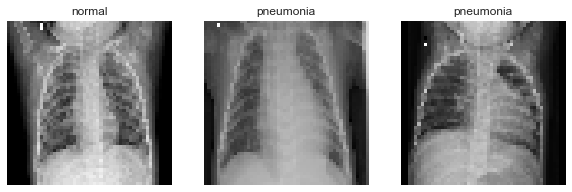

In [15]:
# Visualizing random images from train samples

show_scan(X,3)

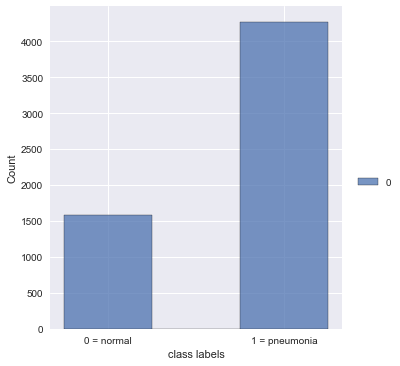

In [9]:
# Distribution of the labels

fg = sns.displot(data=Y, binwidth=0.4)
fg.ax.set_xticks([0.2,1])
fg.ax.set_xticklabels(['0 = normal','1 = pneumonia'])
fg.ax.set_xlabel('class labels')
plt.show()

min: 0.00, max: 255.00


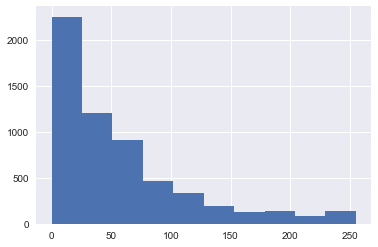

In [43]:
# Distribution of the data along the first dimension

print('min: {:.2f}, max: {:.2f}'.format(X[:,0,0,0].min(), X[:,0,0,0].max()))
plt.hist(X[:,0,0,0])
plt.show()

In [18]:
# Picking a random scan

random_num = np.random.randint(0,len(X))

min: 3.00, max: 182.00


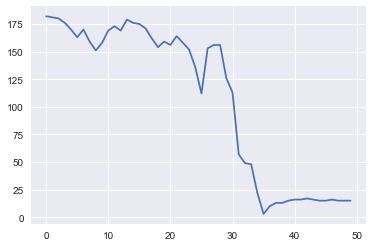

In [44]:
# Distribution of the data along the second dimension for the selected scan

print('min: {:.2f}, max: {:.2f}'.format(X[random_num,:,0,0].min(), X[random_num,:,0,0].max()))
plt.plot(X[random_num,:,0,0])
plt.show()

min: 5.00, max: 182.00


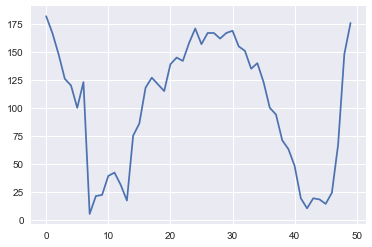

In [45]:
# Distribution of the data along the third dimension for the selected scan

print('min: {:.2f}, max: {:.2f}'.format(X[random_num,0,:,0].min(), X[random_num,0,:,0].max()))
plt.plot(X[random_num,0,:,0])
plt.show()

In [46]:
# Min and Max for the last dimension for the selected scan

print('min: {0:.2f}, max: {1:.2f}'.format(X[random_num,0,0,:].min(), X[random_num,0,0,:].max()))

min: 182.00, max: 182.00


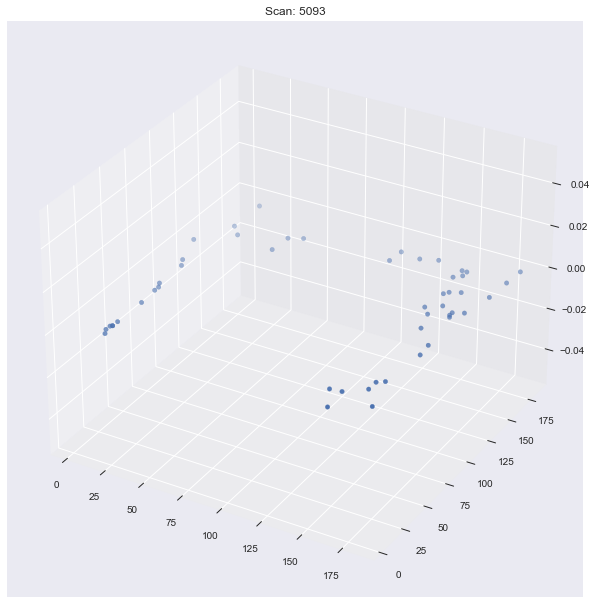

In [24]:
# 3D representation of the selected scan

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)

ax.scatter(xs=X[random_num][:,0,0], ys=X[random_num][0,:,0], marker='o')
ax.set_title('Scan: ' + str(random_num))
plt.show()

### FEATURE ENGINEERING ###

**Reshape the images based on channel**

In [47]:
img_rows, img_cols = IMAGE_SIZE

if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 3, img_rows, img_cols)
    INPUT_SHAPE = (3, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 3)
    INPUT_SHAPE = (img_rows, img_cols, 3)
    
print(X.shape)

(5856, 50, 50, 3)


**Normalizing and casting**

In [48]:
# Divide by 255 to obtain an array of values between 0 and 1 which will be digested by the algorithm

X = X/255

X = X.astype('float32')
Y = Y.astype('float32')

**Train-test split**

In [49]:
# use stratified shuffle split
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# generate the train and test indexes
train_index, test_index = next(strat_shuf_split.split(X, Y))

# generate the train datasets
X_train = X[train_index,:]
y_train = Y[train_index]

# generate the test datasets
X_test  = X[test_index,:]
y_test  = Y[test_index]

print(X_train.shape
    , y_train.shape
    , X_test.shape
    , y_test.shape
)

(4684, 50, 50, 3) (4684, 1) (1172, 50, 50, 3) (1172, 1)


## MODEL DEFINITION ##

**Logistics regression (non-deep learning model as baseline)**

In [50]:
# Re-shaping the data to fit for a logistics regression

X_train_LR = np.reshape(X_train, (len(X_train),-1))
X_test_LR = np.reshape(X_test, (len(X_test),-1))
y_train_LR = np.reshape(y_train, (len(y_train),))
y_test_LR = np.reshape(y_test, (len(y_test),))

In [51]:
# Fitting and predicting using normal parameters

LR = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_LR,y_train_LR)
yhat = LR.predict(X_test_LR)
yhat_proba = LR.predict_proba(X_test_LR)
yhat

array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [52]:
# Printing the sci-kit learn accuracy score which I'll use as baseline

print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test_LR, yhat)*100))

Accuracy score: 94.62%


In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    pass

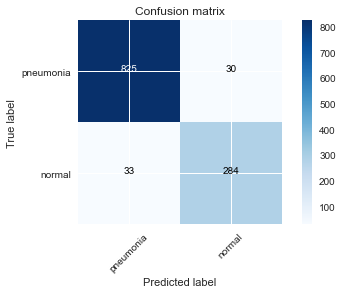

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

# Plot confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['pneumonia','normal'],normalize= False,  title='Confusion matrix')

## DEEP LEARNING ##

### Modeling a CNN ###

In [192]:
def modeling(activation_func='relu', 
             conv_dim = 5, 
             strides_dim = 2, 
             input_shape_img=None, 
             num_classes = 1):
    '''
    This function creates the model based on different parameters, complile and save it.
    '''

    model = Sequential()
    
    # Feature layers
    
    # 1st conv layer, filter 32, kernel size = (5,5), stride = (2,2), padding    
    model.add(Conv2D(32, conv_dim, strides = strides_dim, padding='same', input_shape=input_shape_img))
    model.add(Activation(activation_func))
    # MaxPooling for regularization
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 2nd conv layer, filter 64
    model.add(Conv2D(64, conv_dim, strides = strides_dim, padding='same'))
    model.add(Activation(activation_func))
    # Dropout for regularization
    model.add(Dropout(0.1))
    # 3rd conv layer, filter 128
    model.add(Conv2D(128, conv_dim, strides = strides_dim, padding='same')) ## (3, 3)
    model.add(Activation(activation_func))
    
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 4th conv layer, filter 256
    model.add(Conv2D(256, conv_dim, strides = strides_dim, padding='same'))
    model.add(Activation(activation_func))

    model.add(Dropout(0.25)) # fraction of the input units to drop

    # Classification layers
    
    # Flatten turns 3x3x32 into 288x1
    model.add(Flatten())
    # Dense layers
    model.add(Dense(512))
    model.add(Activation(activation_func))

    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation('sigmoid'))
    
    return model

In [193]:
# just running a test
model = modeling(input_shape_img=INPUT_SHAPE)
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_160 (Conv2D)          (None, 25, 25, 32)        2432      
_________________________________________________________________
activation_240 (Activation)  (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_241 (Activation)  (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 4, 4, 128)       

In [194]:
# start time
start_time = time.time()

BATCH_SIZE = 32

# initiate RMSprop optimizer
opt = RMSprop(lr=0.001) # Learning rate

# Modeling
model = modeling(input_shape_img=INPUT_SHAPE)

model.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['BinaryAccuracy']) 

# Training
history = model.fit(X_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=10,
              validation_data=(X_test, y_test),
              shuffle=True)

print('\nAccuracy score: {:.2f}%'.format(accuracy_score(y_test, model.predict_classes(X_test))*100),
     '\nBinaryAccuracy: {:.2f}%'.format(np.max(history.history['val_binary_accuracy'])*100),
     '\nRun in {:.2f} seconds.'.format(time.time() - start_time))

Epoch 1/10
147/147 [==============================] - 20s 132ms/step - loss: 0.6654 - binary_accuracy: 0.7248 - val_loss: 0.2895 - val_binary_accuracy: 0.8729
Epoch 2/10
147/147 [==============================] - 17s 119ms/step - loss: 0.2511 - binary_accuracy: 0.9098 - val_loss: 0.1909 - val_binary_accuracy: 0.9275
Epoch 3/10
147/147 [==============================] - 18s 120ms/step - loss: 0.1872 - binary_accuracy: 0.9294 - val_loss: 0.2439 - val_binary_accuracy: 0.9113
Epoch 4/10
147/147 [==============================] - 18s 125ms/step - loss: 0.1630 - binary_accuracy: 0.9380 - val_loss: 0.1426 - val_binary_accuracy: 0.9514
Epoch 5/10
147/147 [==============================] - 17s 116ms/step - loss: 0.1665 - binary_accuracy: 0.9388 - val_loss: 0.1464 - val_binary_accuracy: 0.9573
Epoch 6/10
147/147 [==============================] - 17s 117ms/step - loss: 0.1639 - binary_accuracy: 0.9517 - val_loss: 0.1488 - val_binary_accuracy: 0.9480
Epoch 7/10
147/147 [==========================

### Fine tuning ###

**Optimizer and activation function - saving the best model**

In [195]:
# Looping through different optimizers and activation functions to find the best score

activation_functions = ['sigmoid', 'tanh', 'relu']
optimizers = [Adam, SGD, RMSprop]

# Initialize targets
best_accuracy = 0
best_optimizer = None
best_activation_function = None

for activation_function in activation_functions:
    for optimizer_function in optimizers:
        # Modeling
        modeling(activation_func=activation_function, input_shape_img=INPUT_SHAPE) # model function
        model.compile(loss='binary_crossentropy', 
              optimizer=optimizer_function(lr=0.001),
              metrics=['BinaryAccuracy']) 
        # Training
        history = model.fit( 
                            X_train, y_train,
                            batch_size=BATCH_SIZE, #1 epoch (default)
                            validation_data=(X_test, y_test), # validation set
                            shuffle=True,
                            verbose=1) 
        # Ranking and saving the best model
        if history.history['val_binary_accuracy'][0] > best_accuracy: #val_binary_accuracy
            best_accuracy = history.history['val_binary_accuracy'][0]
            best_optimizer = optimizer_function
            best_activation_function = activation_function
            model.save('./data/best_model.h5')

print('\nThe best optimizer is {}, the best activation function is {}, for an accuracy of {:.2f}%'
     .format(optimizer_function, best_activation_function, best_accuracy*100))

147/147 [==============================] - 20s 126ms/step - loss: 0.1069 - binary_accuracy: 0.9676 - val_loss: 0.1306 - val_binary_accuracy: 0.9582

The best optimizer is <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, the best activation function is tanh, for an accuracy of 96.76%


**Reduce bias**

In [196]:
# Finding the proportion between scans with and without pneumonia, and calculating the weights to counter-balance the bias during training

# Use scikit-learn
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.reshape(y_train, (-1,)))

class_weights = {0: class_weights[0], 1: class_weights[1]}

print("Weight for class 0: {:.2f}".format(class_weights[0]))
print("Weight for class 1: {:.2f}".format(class_weights[1]))

Weight for class 0: 1.85
Weight for class 1: 0.69


In [197]:
# Training the model adding class weights

# Loading the model from the most recent optimization
model = load_model('./data/best_model.h5')

# Training
history = model.fit(
                    X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights, 
                    shuffle=True,
                    verbose=1) 

# Verifying improvements
if np.max(history.history['val_binary_accuracy']) > best_accuracy:
    best_accuracy = np.max(history.history['val_binary_accuracy'])
    print('\nValidation accuracy improved: {:.2f}%'.format(best_accuracy*100))
else:
    print('\nAdding class weights didn\'t improve the accuracy')

Epoch 1/10
147/147 [==============================] - 17s 117ms/step - loss: 0.0585 - binary_accuracy: 0.9780 - val_loss: 0.1266 - val_binary_accuracy: 0.9616
Epoch 2/10
147/147 [==============================] - 19s 127ms/step - loss: 0.0521 - binary_accuracy: 0.9784 - val_loss: 0.1383 - val_binary_accuracy: 0.9608
Epoch 3/10
147/147 [==============================] - 20s 133ms/step - loss: 0.0511 - binary_accuracy: 0.9787 - val_loss: 0.1289 - val_binary_accuracy: 0.9633
Epoch 4/10
147/147 [==============================] - 19s 126ms/step - loss: 0.0483 - binary_accuracy: 0.9793 - val_loss: 0.1269 - val_binary_accuracy: 0.9642
Epoch 5/10
147/147 [==============================] - 17s 114ms/step - loss: 0.0471 - binary_accuracy: 0.9801 - val_loss: 0.1300 - val_binary_accuracy: 0.9633
Epoch 6/10
147/147 [==============================] - 16s 109ms/step - loss: 0.0458 - binary_accuracy: 0.9825 - val_loss: 0.1416 - val_binary_accuracy: 0.9633
Epoch 7/10
147/147 [==========================

**Data augmentation**

In [198]:
# Using Keras to generate artificial images (flipping and rotating)

datagen = ImageDataGenerator(
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [199]:
# Loading the model from the most recent optimization
model = load_model('./data/best_model.h5')

# Training
history = model.fit(
                    datagen.flow(X_train,y_train),
                    batch_size=BATCH_SIZE,
                    epochs=10,
                    validation_data=datagen.flow(X_test, y_test),
                    class_weight=class_weights, 
                    shuffle=True,
                    verbose=1) 

# Verifying improvements
if np.max(history.history['val_binary_accuracy']) > best_accuracy:
    best_accuracy = np.max(history.history['val_binary_accuracy'])
    print('\nValidation accuracy improved: {:.2f}%'.format(best_accuracy*100))
else:
    print('\nData augmentation didn\'t improve the accuracy')

Epoch 1/10
147/147 [==============================] - 20s 135ms/step - loss: 0.8240 - binary_accuracy: 0.7329 - val_loss: 0.5573 - val_binary_accuracy: 0.7560
Epoch 2/10
147/147 [==============================] - 23s 155ms/step - loss: 0.5649 - binary_accuracy: 0.7598 - val_loss: 0.5478 - val_binary_accuracy: 0.7483
Epoch 3/10
147/147 [==============================] - 25s 170ms/step - loss: 0.5541 - binary_accuracy: 0.7573 - val_loss: 0.5432 - val_binary_accuracy: 0.7577
Epoch 4/10
147/147 [==============================] - 20s 134ms/step - loss: 0.5377 - binary_accuracy: 0.7564 - val_loss: 0.4715 - val_binary_accuracy: 0.8131
Epoch 5/10
147/147 [==============================] - 19s 130ms/step - loss: 0.4981 - binary_accuracy: 0.7869 - val_loss: 0.4135 - val_binary_accuracy: 0.8362
Epoch 6/10
147/147 [==============================] - 18s 124ms/step - loss: 0.4802 - binary_accuracy: 0.7997 - val_loss: 0.4664 - val_binary_accuracy: 0.7944
Epoch 7/10
147/147 [==========================

## Training after fine tuning ##

**Adding more regularization with Early Stop and Reduce Learning Rate On Plateau.**

In [215]:
# Initializing callbacks
path = f'./data/best_model.h5'

# Saves the model in-between epochs when there is an improvement in val_loss
checkpoint = ModelCheckpoint(path,
                                monitor='val_loss',
                                mode="min",
                                save_best_only = True,
                                verbose=1)

# Stops training the model when no improvement in val_loss is observed after set patience
earlystop = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0, 
                              patience = 8,
                              verbose = 1,
                              restore_best_weights = True)

# Monitors val_accuracy for a set 'patience', then the learning rate is reduced by a factor specified in the parameters
reduce_lr = ReduceLROnPlateau(monitor='val_binary_accuracy', 
                              patience = 4,
                              verbose=1,
                              factor=0.3, 
                              min_lr=0.00001)

# callbacks pipeline
callbacks_pipeline = [checkpoint, earlystop, reduce_lr]

In [216]:
# Modelling and training using the chosen optimizer, activation function, callbacks, no weights and no data augmentation.

# Loading the model from the most recent optimization
model = load_model('./data/best_model.h5')

# Training
history = model.fit(
                X_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=15,
                validation_data=(X_test, y_test),
                callbacks=callbacks_pipeline,
                shuffle=True,
                verbose=1)

# Verifying improvements
if np.max(history.history['val_binary_accuracy']) > best_accuracy:
    best_accuracy = np.max(history.history['val_binary_accuracy'])
    print('\nValidation accuracy improved: {:.2f}%'.format(best_accuracy*100))
else:
    print('\nMore regularization didn\'t improve the accuracy')

Epoch 1/15
147/147 [==============================] - 16s 108ms/step - loss: 0.0445 - binary_accuracy: 0.9831 - val_loss: 0.1231 - val_binary_accuracy: 0.9684

Epoch 00001: val_loss improved from inf to 0.12309, saving model to ./data/best_model.h5
Epoch 2/15
147/147 [==============================] - 18s 120ms/step - loss: 0.0437 - binary_accuracy: 0.9831 - val_loss: 0.1249 - val_binary_accuracy: 0.9667

Epoch 00002: val_loss did not improve from 0.12309
Epoch 3/15
147/147 [==============================] - 19s 129ms/step - loss: 0.0396 - binary_accuracy: 0.9829 - val_loss: 0.1273 - val_binary_accuracy: 0.9659

Epoch 00003: val_loss did not improve from 0.12309
Epoch 4/15
147/147 [==============================] - 19s 128ms/step - loss: 0.0398 - binary_accuracy: 0.9848 - val_loss: 0.1302 - val_binary_accuracy: 0.9667

Epoch 00004: val_loss did not improve from 0.12309
Epoch 5/15
147/147 [==============================] - 17s 118ms/step - loss: 0.0374 - binary_accuracy: 0.9842 - val_lo

**Evaluating against the test set**

In [218]:
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, model.predict_classes(X_test))*100))

Accuracy score: 96.84%


**We reached an accuracy score which exceeds the Logistics Regression**

In [203]:
def plot_validation_curves(result, metric):
    '''
    This function plots the validation curves.
    '''
    result = pd.DataFrame(result)
    fig, axs = plt.subplots(1,2)
    result[['loss','val_loss']].plot(figsize=(10, 3),ax=axs[0])
    axs[0].set_title('Train vs validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    result[[metric,'val_' + metric]].plot(figsize=(10, 3),ax=axs[1])
    axs[1].set_title('Train vs validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    
    pass

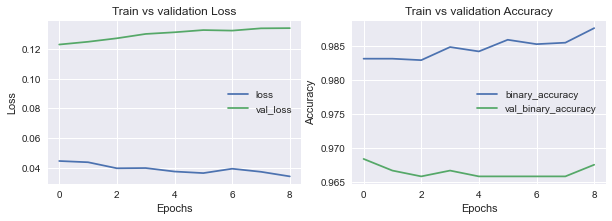

In [219]:
# Plotting the validation curves
plot_validation_curves(history.history, 'binary_accuracy')

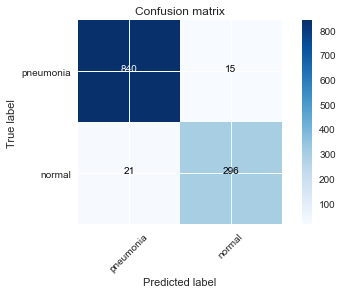

In [70]:
predictions = model.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, np.round(predictions), labels=[1,0])
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['pneumonia','normal'],normalize= False,  title='Confusion matrix')

This image is 0.08% pneumonia and 99.92% normal.


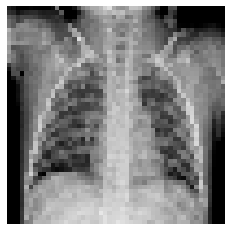

In [78]:
# Showing a randomly selected scan along with the probability that it's a pneumonia vs normal.

random_num = np.random.randint(0,len(X_test))
prediction = model.predict_proba(X_test[random_num:random_num+1,:,:,:])
score = prediction[0]

print('This image is {:.2f}% pneumonia and {:.2f}% normal.'.format(100 * score[0],100*(1-score[0])))
# plt.figure(figsize=(6,6))
plt.imshow(X_test[random_num,:,:,:])
plt.grid(False)
plt.axis('off')
plt.show()

## Transfer learning ##

In [92]:
# Setting the path for the dataset with Covid 19 scans
PATH = "./data/covid19/"

In [93]:
# Getting lists
n, p, ln, lp = get_path(PATH, '.png')

# Getting images in numeric format
xn, xp = get_images(n, p, ln, lp)

In [94]:
# Merging the features and the class labels of the scans with a without pneumonia

X_covid = np.vstack((xp, xn))
Y_covid = np.vstack((np.reshape(np.array(lp),(-1,1)), np.reshape(np.array(ln),(-1,1))))
print(X_covid.shape, Y_covid.shape)

(5856, 50, 50, 3) (5856, 1)


In [95]:
# Normalizing and casting as float

X_covid = X_covid/255

X_covid = X_covid.astype('float32')
Y_covid = Y_covid.astype('float32')

### Modeling a CNN with Feature Layers and Classification Layers ##

In [102]:
# Using the same design with conv 2D as before (same number of trainable params)

# Feature layers
feature_layers = [
Conv2D(32, 5, strides = 2, padding='same', input_shape=INPUT_SHAPE), 
Activation('relu'),
MaxPooling2D(pool_size=(2, 2), padding='same'),
Conv2D(64, 5, strides = 2, padding='same'),
Activation('relu'),
Dropout(0.1),
Conv2D(128, 5, strides = 2, padding='same'), ## (3, 3)
Activation('relu'),
MaxPooling2D(pool_size=(2, 2), padding='same'),
Conv2D(256, 5, strides = 2, padding='same'),
Activation('relu'),
Dropout(0.25) # fraction of the input units to drop
]

# Classification layers
classification_layers = [
Flatten(),
Dense(512),
Activation('relu'),
Dropout(0.5),
Dense(1),
Activation('sigmoid')
]

model_1 = Sequential(feature_layers + classification_layers)

model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 25, 25, 32)        2432      
_________________________________________________________________
activation_30 (Activation)   (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_31 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 128)        

**Training the CNN with the regular dataset**

In [103]:
# start time
start_time = time.time()

# Let's train the model using RMSprop
model_1.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['BinaryAccuracy']) 

# Training
history = model_1.fit(X, Y,
              batch_size=BATCH_SIZE,
              epochs=10,
              validation_split=0.2, # Using validation split to obtain the test set
              shuffle=True)

print('\nRun in {:.2f} seconds.'.format(time.time() - start_time))

Epoch 1/10
147/147 [==============================] - 18s 115ms/step - loss: 0.6195 - binary_accuracy: 0.6910 - val_loss: 0.1880 - val_binary_accuracy: 0.9292
Epoch 2/10
147/147 [==============================] - 17s 113ms/step - loss: 0.2383 - binary_accuracy: 0.9134 - val_loss: 0.2967 - val_binary_accuracy: 0.8916
Epoch 3/10
147/147 [==============================] - 16s 110ms/step - loss: 0.1890 - binary_accuracy: 0.9245 - val_loss: 0.2094 - val_binary_accuracy: 0.9206
Epoch 4/10
147/147 [==============================] - 16s 109ms/step - loss: 0.1750 - binary_accuracy: 0.9365 - val_loss: 0.0262 - val_binary_accuracy: 0.9932
Epoch 5/10
147/147 [==============================] - 16s 111ms/step - loss: 0.1379 - binary_accuracy: 0.9478 - val_loss: 0.0513 - val_binary_accuracy: 0.9932
Epoch 6/10
147/147 [==============================] - 18s 121ms/step - loss: 0.1569 - binary_accuracy: 0.9454 - val_loss: 0.2904 - val_binary_accuracy: 0.9172
Epoch 7/10
147/147 [==========================

In [107]:
print('\nAccuracy metric: {:.2f}%'.format(np.max(model_1.evaluate(X, Y, batch_size=BATCH_SIZE))*100))

183/183 [==============================] - 3s 14ms/step - loss: 0.3473 - binary_accuracy: 0.9078

Accuracy metric: 90.78%


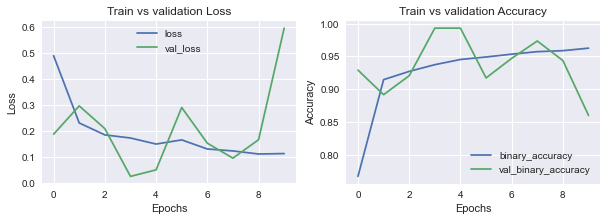

In [105]:
# Plotting the validation curves
plot_validation_curves(history.history, 'binary_accuracy')

In [108]:
# Setting the Feature Layers as non trainable

for l in feature_layers:
    l.trainable = False

# Note 1,078,080 non trainable params
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 25, 25, 32)        2432      
_________________________________________________________________
activation_30 (Activation)   (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_31 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 128)        

**Training only the classification layers with the new Covid 19 data**

In [109]:
# start time
start_time = time.time()

# Training 
history = model_1.fit(X_covid, Y_covid,
              batch_size=BATCH_SIZE,
              epochs=10,
              validation_split=0.2,
              shuffle=True)

print('\nRun in {:.2f} seconds.'.format(time.time() - start_time))

Epoch 1/10
147/147 [==============================] - 17s 116ms/step - loss: 0.4075 - binary_accuracy: 0.8354 - val_loss: 0.3583 - val_binary_accuracy: 0.8148
Epoch 2/10
147/147 [==============================] - 17s 115ms/step - loss: 0.3145 - binary_accuracy: 0.8772 - val_loss: 0.5734 - val_binary_accuracy: 0.6928
Epoch 3/10
147/147 [==============================] - 17s 119ms/step - loss: 0.2499 - binary_accuracy: 0.8945 - val_loss: 0.4636 - val_binary_accuracy: 0.8200
Epoch 4/10
147/147 [==============================] - 18s 124ms/step - loss: 0.2307 - binary_accuracy: 0.9155 - val_loss: 0.5118 - val_binary_accuracy: 0.8200
Epoch 5/10
147/147 [==============================] - 19s 129ms/step - loss: 0.2063 - binary_accuracy: 0.9204 - val_loss: 0.4337 - val_binary_accuracy: 0.8276
Epoch 6/10
147/147 [==============================] - 20s 136ms/step - loss: 0.2045 - binary_accuracy: 0.9227 - val_loss: 0.2555 - val_binary_accuracy: 0.8908
Epoch 7/10
147/147 [==========================

In [110]:
print('\nAccuracy metric: {:.2f}%'.format(np.max(model_1.evaluate(X_covid, Y_covid, batch_size=BATCH_SIZE))*100))

183/183 [==============================] - 3s 14ms/step - loss: 0.2073 - binary_accuracy: 0.9250

Accuracy metric: 92.50%


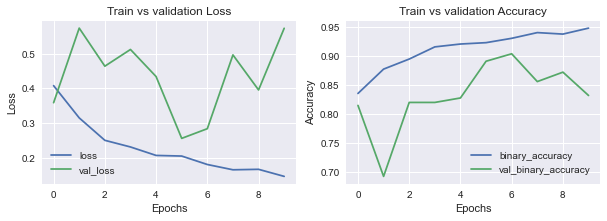

In [111]:
# Plotting the validation curves
plot_validation_curves(history.history, 'binary_accuracy')

## Autoencoders ##

### Scikit-learn PCA ###

**Verify exlained variance**

In [112]:
# Use scikit-learn PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=200)

fit_pca = pca.fit(X_train_LR) # Re-use the flat data from Logistic Regression

print("Variance explained with {0} components:".format(200), 
      round(sum(fit_pca.explained_variance_ratio_), 2))

Variance explained with 200 components: 0.91


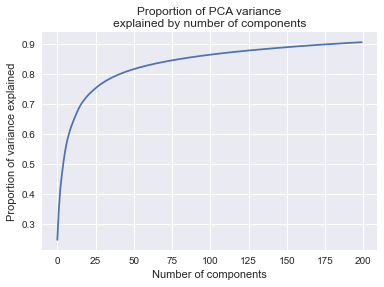

In [113]:
plt.plot(np.cumsum(fit_pca.explained_variance_ratio_))
plt.title("Proportion of PCA variance\nexplained by number of components")
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained");

**Measure reconstruction error metric**

In [114]:
# Encoding and reverse decoding

X_test_pca = pca.transform(X_test_LR)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

In [115]:
def mse_reconstruction(true, reconstructed):
    '''
    This function calculates the MSE
    '''
    return np.sum(np.power(true - reconstructed, 2) / true.shape[1])

In [117]:
print('mse of the PCA reconstructed data: {:.2f}'.format(mse_reconstruction(X_test_LR, X_test_reconstructed)))

mse of the PCA reconstructed data: 2.90


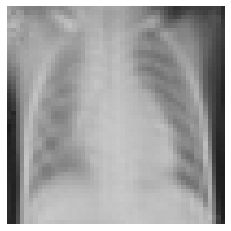

In [120]:
# Show a sample scan from the reconstructed data

X_test_reconstructed_reshaped = np.reshape(X_test_reconstructed,tuple([-1]+list(INPUT_SHAPE)))

random_num = np.random.randint(0,len(X_test_reconstructed_reshaped))

# plt.figure(figsize=(12,6))
plt.imshow(X_test_reconstructed_reshaped[random_num,:,:,:])
plt.grid(False)
plt.axis('off')
plt.show()

**Evaluate a CNN trained using the reconstructed data**

In [165]:
# Train a CNN using the reconstructed data

# start time
start_time = time.time()

# initiate RMSprop optimizer
opt = RMSprop(lr=0.001)

# Modeling
model_pca = modeling(input_shape_img=INPUT_SHAPE)

model_pca.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['BinaryAccuracy']) 

print(model_pca.summary())

# Training
history_pca = model_pca.fit(X_test_reconstructed_reshaped, y_test,
              batch_size=BATCH_SIZE,
              epochs=10,
              validation_split=0.2, # Train-test split
              shuffle=True)

print('\nAccuracy score: {:.2f}%'.format(accuracy_score(y_test, model_pca.predict_classes(X_test_reconstructed_reshaped))*100))

print('\nRun in {:.2f} seconds.'.format(time.time() - start_time))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 25, 25, 32)        2432      
_________________________________________________________________
activation_108 (Activation)  (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_109 (Activation)  (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 4, 4, 128)       

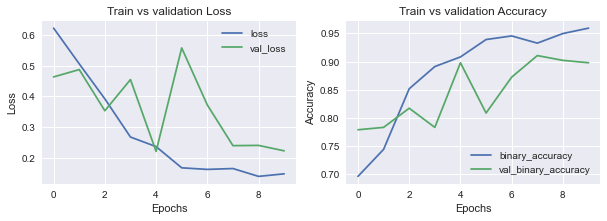

In [205]:
# Plotting the validation curves
plot_validation_curves(history_pca.history, 'binary_accuracy')

### Keras autoencoder model ###

**Encoder and decoder**

In [153]:
ENCODING_DIM = 128

# Encoder model
inputs = Input(shape=(7500,)) 
encoded = Dense(ENCODING_DIM, activation="sigmoid")(inputs)
encoder_model = Model(inputs, encoded, name='encoder')

# Decoder model
encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
reconstruction = Dense(7500, activation="sigmoid")(encoded_inputs)
decoder_model = Model(encoded_inputs, reconstruction, name='decoder')

# Defining the full model as the combination of the two
outputs = decoder_model(encoder_model(inputs))
full_model_1 = Model(inputs, outputs, name='full_ae')

full_model_1.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

full_model_1.summary()

Model: "full_ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 7500)]            0         
_________________________________________________________________
encoder (Functional)         (None, 128)               960128    
_________________________________________________________________
decoder (Functional)         (None, 7500)              967500    
Total params: 1,927,628
Trainable params: 1,927,628
Non-trainable params: 0
_________________________________________________________________


In [154]:
history = full_model_1.fit(X_train_LR, X_train_LR, shuffle=True, epochs=5, batch_size=32)

Epoch 1/5
147/147 [==============================] - 5s 34ms/step - loss: 0.6352 - accuracy: 6.2492e-04
Epoch 2/5
147/147 [==============================] - 5s 34ms/step - loss: 0.6077 - accuracy: 5.8751e-04
Epoch 3/5
147/147 [==============================] - 5s 35ms/step - loss: 0.6022 - accuracy: 0.0018
Epoch 4/5
147/147 [==============================] - 5s 34ms/step - loss: 0.5966 - accuracy: 5.1057e-04
Epoch 5/5
147/147 [==============================] - 5s 34ms/step - loss: 0.5931 - accuracy: 0.0015


In [155]:
decoded_images_1 = full_model_1.predict(X_test_LR)
print('mse of the PCA reconstructed data: {:.2f}'.format(mse_reconstruction(decoded_images, X_test_LR)))

mse of the PCA reconstructed data: 17.09


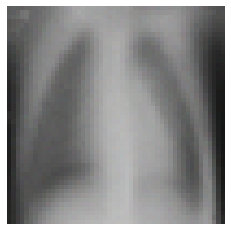

In [157]:
# Show a sample scan from the reconstructed data

decoded_images_reshaped_1 = np.reshape(decoded_images_1,tuple([-1]+list(INPUT_SHAPE)))

random_num = np.random.randint(0,len(decoded_images_reshaped_1))

# plt.figure(figsize=(12,6))
plt.imshow(decoded_images_reshaped_1[random_num,:,:,:])
plt.grid(False)
plt.axis('off')
plt.show()

In [211]:
# Train a CNN using the reconstructed data

# start time
start_time = time.time()

# initiate RMSprop optimizer
opt = RMSprop(lr=0.001)

# Modeling
model_ae1 = modeling(input_shape_img=INPUT_SHAPE)

model_ae1.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['BinaryAccuracy']) 

print(model_ae1.summary())

# Training
history_ae1 = model_ae1.fit(decoded_images_reshaped_1, y_test,
              batch_size=BATCH_SIZE,
              epochs=10,
              validation_split=0.2, # Train-test split
              shuffle=True)

print('\nAccuracy score: {:.2f}%'.format(accuracy_score(y_test, model_pca.predict_classes(decoded_images_reshaped_1))*100))

print('\nRun in {:.2f} seconds.'.format(time.time() - start_time))

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_212 (Conv2D)          (None, 25, 25, 32)        2432      
_________________________________________________________________
activation_318 (Activation)  (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_319 (Activation)  (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_159 (Dropout)        (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 4, 4, 128)       

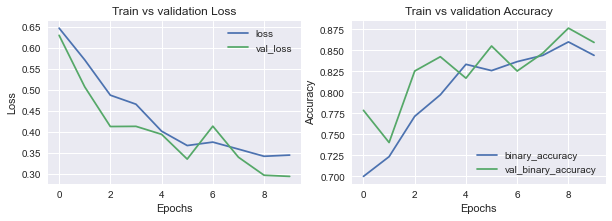

In [212]:
# Plotting the validation curves
plot_validation_curves(history_ae1.history, 'binary_accuracy')

**Encoder and decoder with additional hidden layer**

In [138]:
ENCODING_DIM = 128
HIDDEN_DIM = 256

# Encoder model
inputs = Input(shape=(7500,)) 
encoder_hidden = Dense(HIDDEN_DIM, activation="sigmoid")(inputs)
encoded = Dense(ENCODING_DIM, activation="relu")(encoder_hidden)
encoder_model = Model(inputs, encoded, name='encoder')

# Decoder model
encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
decoder_hidden = Dense(HIDDEN_DIM, activation="relu")(encoded_inputs)
reconstruction = Dense(7500, activation="sigmoid")(decoder_hidden)
decoder_model = Model(encoded_inputs, reconstruction, name='decoder')

# Defining the full model as the combination of the two
outputs = decoder_model(encoder_model(inputs))
full_model_2 = Model(inputs, outputs, name='full_ae_2')

full_model_2.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

full_model_2.summary()

Model: "full_ae_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 7500)]            0         
_________________________________________________________________
encoder (Functional)         (None, 128)               1953152   
_________________________________________________________________
decoder (Functional)         (None, 7500)              1960524   
Total params: 3,913,676
Trainable params: 3,913,676
Non-trainable params: 0
_________________________________________________________________


In [140]:
history = full_model_2.fit(X_train_LR, X_train_LR, shuffle=True, epochs=5, batch_size=32)

Epoch 1/5
147/147 [==============================] - 12s 74ms/step - loss: 0.6261 - accuracy: 7.0627e-04
Epoch 2/5
147/147 [==============================] - 9s 64ms/step - loss: 0.6116 - accuracy: 7.1765e-04
Epoch 3/5
147/147 [==============================] - 10s 66ms/step - loss: 0.6064 - accuracy: 0.0000e+00
Epoch 4/5
147/147 [==============================] - 9s 64ms/step - loss: 0.6041 - accuracy: 6.2201e-04
Epoch 5/5
147/147 [==============================] - 9s 63ms/step - loss: 0.6011 - accuracy: 1.1659e-04


In [142]:
decoded_images_2 = full_model_2.predict(X_test_LR)
print('mse of the PCA reconstructed data: {:.2f}'.format(mse_reconstruction(decoded_images_2, X_test_LR)))

mse of the PCA reconstructed data: 17.22


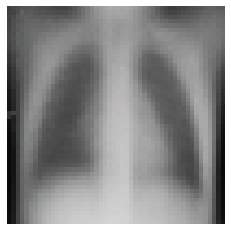

In [143]:
# Show a sample scan from the reconstructed data

decoded_images_reshaped_2 = np.reshape(decoded_images_2,tuple([-1]+list(INPUT_SHAPE)))

random_num = np.random.randint(0,len(decoded_images_reshaped_2))

# plt.figure(figsize=(12,6))
plt.imshow(decoded_images_reshaped_2[random_num,:,:,:])
plt.grid(False)
plt.axis('off')
plt.show()

In [213]:
# start time
start_time = time.time()

# initiate RMSprop optimizer
opt = RMSprop(lr=0.001)

model_ae2 = modeling(input_shape_img=INPUT_SHAPE)

# Let's train the model using RMSprop
model_ae2.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['BinaryAccuracy'])

print(model_ae2.summary())

history_ae2 = model_ae2.fit(decoded_images_reshaped_2, y_test,
              batch_size=BATCH_SIZE,
              epochs=10,
              validation_split=0.1,
              shuffle=True)

print('\nAccuracy score: {:.2f}%'.format(accuracy_score(y_test, model_ae2.predict_classes(decoded_images_reshaped_2))*100))

print('\nRun in {:.2f} seconds.'.format(time.time() - start_time))

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 25, 25, 32)        2432      
_________________________________________________________________
activation_324 (Activation)  (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_325 (Activation)  (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_162 (Dropout)        (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 4, 4, 128)       

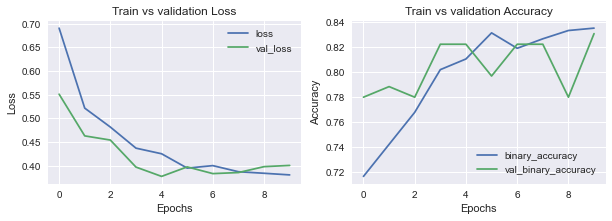

In [214]:
# Plotting the validation curves
plot_validation_curves(history_ae2.history, 'binary_accuracy')

**THANK YOU!**